In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msn

%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [39]:
hotel_data = pd.read_csv("/content/RADISSON HOTEL.csv")
hotel_data.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [3]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21950 entries, 0 to 21949
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           21950 non-null  object 
 1   is_canceled                     21950 non-null  int64  
 2   lead_time                       21950 non-null  int64  
 3   arrival_date_year               21950 non-null  int64  
 4   arrival_date_month              21950 non-null  object 
 5   arrival_date_week_number        21950 non-null  int64  
 6   arrival_date_day_of_month       21950 non-null  int64  
 7   stays_in_weekend_nights         21950 non-null  int64  
 8   stays_in_week_nights            21950 non-null  int64  
 9   adults                          21950 non-null  int64  
 10  children                        21950 non-null  int64  
 11  babies                          21950 non-null  int64  
 12  meal                            

In [4]:
hotel_data.isnull().sum().sort_values(ascending = False)


# hotel_data


company                           20108
agent                              4639
country                             455
reservation_status_date               1
reservation_status                    1
total_of_special_requests             1
required_car_parking_spaces           1
adr                                   1
previous_cancellations                0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
hotel                                 0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
children                              0
adults                                0
stays_in_week_nights                  0


In [5]:
hotel_data.drop('company',axis=1, inplace=True)

In [6]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,17311.000000,21950.000000,21949.000000,21949.000000,21949.000000
mean,0.505011,101.529977,2015.829066,28.522551,15.629157,1.190524,3.171025,1.867426,0.133804,0.011800,0.048200,0.182916,0.210797,0.233440,214.659927,0.718360,91.686536,0.091303,0.542530
std,0.499986,101.082346,0.746540,14.328740,8.929175,1.156315,2.475503,0.849090,0.460179,0.110075,0.214194,1.797490,1.253500,0.638202,84.537603,8.567604,59.621463,0.289151,0.787047
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,15.000000,2015.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,0.000000,48.000000,0.000000,0.000000
50%,1.000000,69.000000,2016.000000,30.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,73.000000,0.000000,0.000000
75%,1.000000,168.000000,2016.000000,40.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,0.000000,120.600000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,531.000000,150.000000,508.000000,2.000000,5.000000


In [7]:
#fill null values
hotel_data["agent"]= hotel_data["agent"].fillna(hotel_data["agent"].median())
hotel_data["children"]= hotel_data["children"].fillna(hotel_data["children"].median())
hotel_data["country"]= hotel_data["country"].fillna(hotel_data["country"].mode()[0])


#replace undefined with null values

c = hotel_data['market_segment'] == 'Undefined'
hotel_data = hotel_data.replace(c,np.nan)

#total number of people visiting the hostel
hotel_data['total_people'] = hotel_data['adults'] + hotel_data['children'] + hotel_data['babies']

#remove the days in which no adults visited to get a proper representation
hotel_data = hotel_data[hotel_data['adults'] != 0]

<Axes: xlabel='hotel', ylabel='count'>

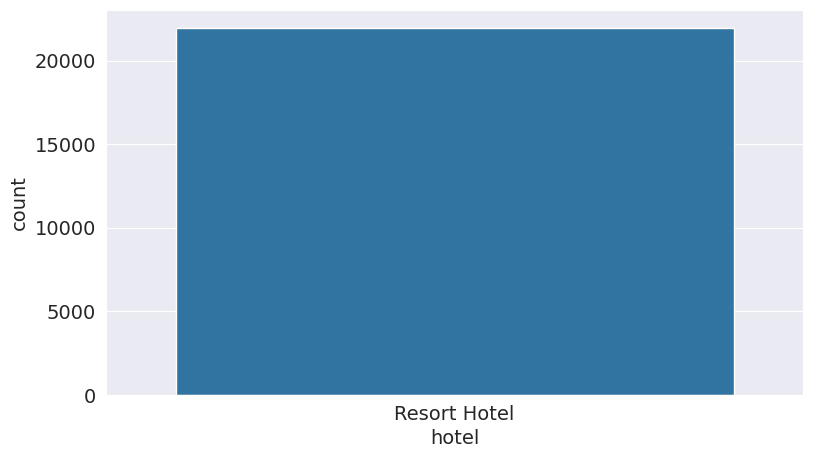

In [8]:
sns.countplot(x= 'hotel',data = hotel_data)

<Axes: xlabel='is_canceled', ylabel='count'>

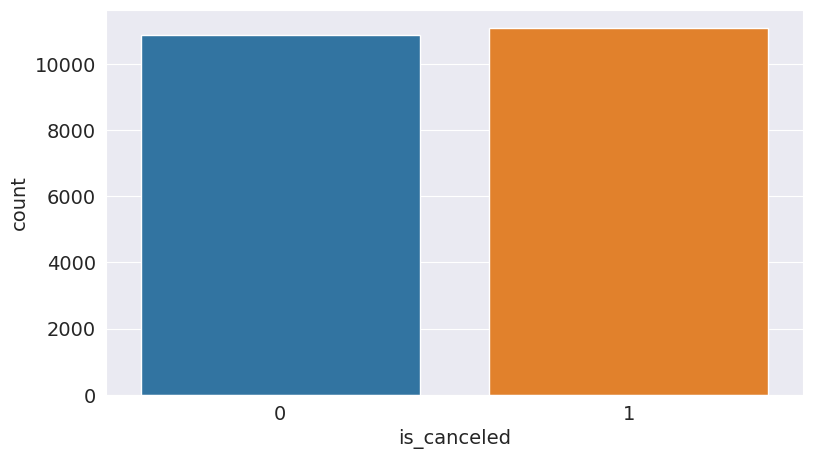

In [9]:
sns.countplot(x= 'is_canceled',data = hotel_data)

<Axes: xlabel='deposit_type', ylabel='count'>

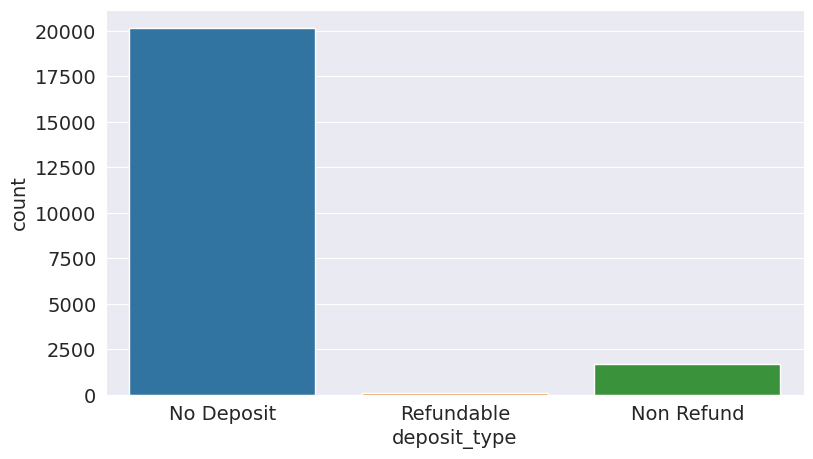

In [10]:
sns.countplot(x= 'deposit_type',data = hotel_data)

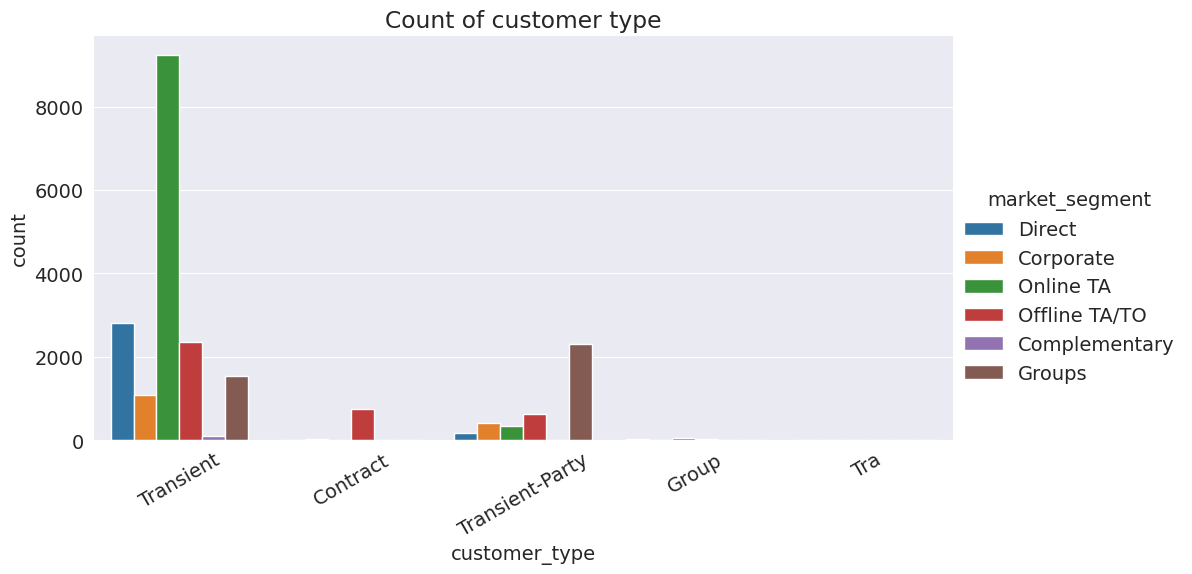

In [11]:

sns.catplot(x = 'customer_type',hue ='market_segment',data = hotel_data, kind = 'count',aspect=2)
plt.title('Count of customer type')
plt.xticks(rotation=30);

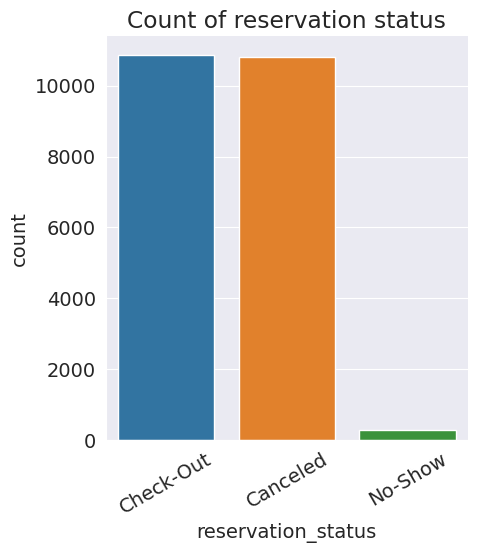

In [12]:
sns.catplot(x = 'reservation_status',data = hotel_data, kind = 'count')
plt.title('Count of reservation status')
plt.xticks(rotation=30);

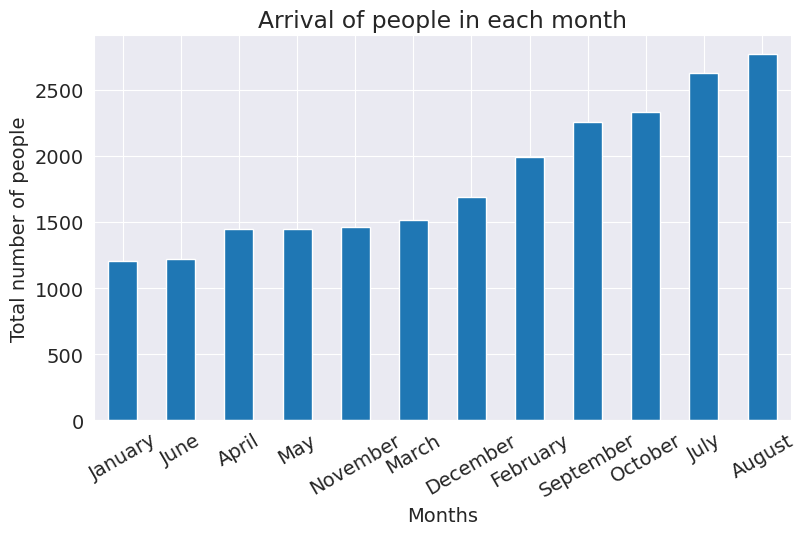

In [13]:
hotel_data['arrival_date_month'].value_counts(ascending= True).plot(kind ='bar')
plt.title('Arrival of people in each month')
plt.xlabel('Months')
plt.ylabel('Total number of people')
plt.xticks(rotation=30);



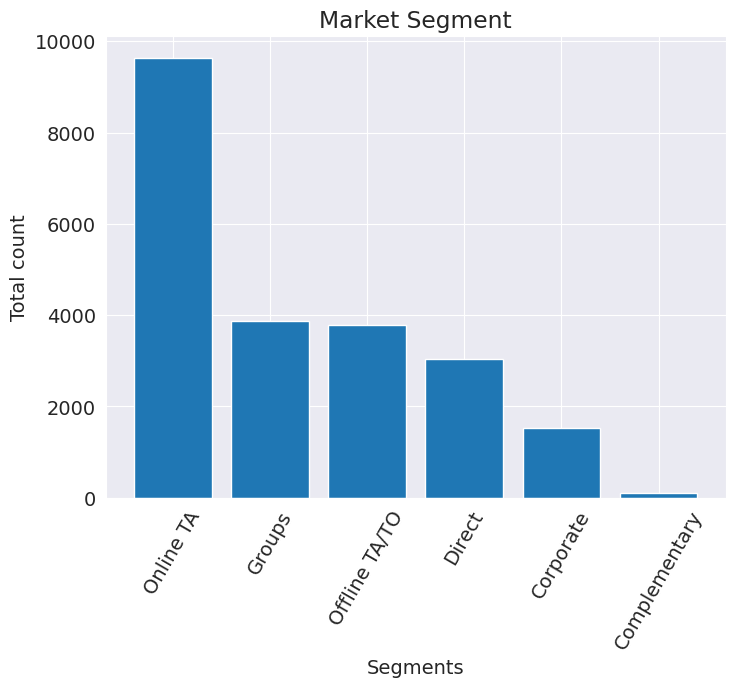

In [14]:
# condition = hotel_data['market_segment'] != 'Undefined'

plt.figure(figsize=(8,6))
plt.xticks(rotation= 60)
segment = hotel_data['market_segment'].value_counts()

plt.bar(x= segment.index, height= segment,)
plt.xlabel('Segments')
plt.ylabel('Total count')
plt.title('Market Segment')
plt.show()


#remove undefined from this column

Text(0.5, 1.0, 'Count of reserved rooms')

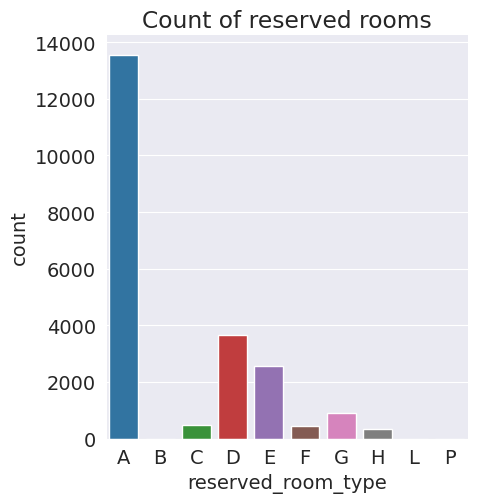

In [15]:
sns.catplot(x = 'reserved_room_type',data = hotel_data, kind = 'count', order =['A','B','C','D','E','F','G','H','L','P'])
plt.title('Count of reserved rooms')
# plt.xticks(rotation=30);

In [16]:
hotel_data["reservation_status_date"] = pd.to_datetime(hotel_data["reservation_status_date"])

# Extract date features
def extract_date_info(df, cols):
    for feat in cols:
        df[feat + "_year"] = df[feat].dt.year
        df[feat + "_day"] = df[feat].dt.day
        df[feat + "_month"] = df[feat].dt.month
        df[feat + "_quarter"] = df[feat].dt.quarter
        df[feat + "_weekday"] = df[feat].dt.weekday
        df[feat + "_week"] = df[feat].dt.isocalendar().week
    df.drop(columns=cols,axis=1,inplace=True)


extract_date_info(hotel_data, ["reservation_status_date"])


date_dic = {
    "January" : 1,
    "February" : 2,
    "March" :3 ,
    "April" :4,
    "May" : 5,
    "June" : 6,
    "July" : 7,
    "August" : 8,
    "September" : 9,
    "October" : 10,
    "November" : 11,
    "December" : 12,
}


# hotel_data



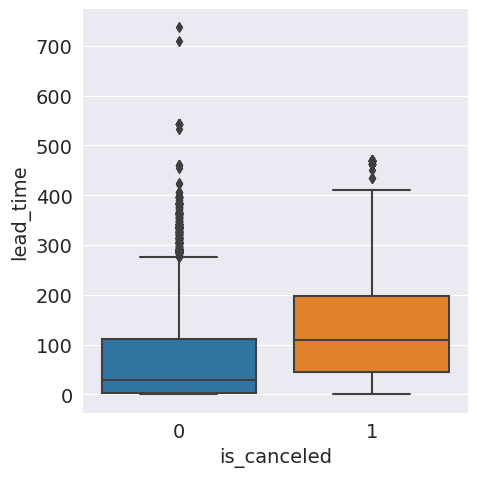

In [17]:
sns.catplot(y= 'lead_time', x = 'is_canceled', data = hotel_data, kind = 'box',)

<Figure size 2000x1500 with 0 Axes>

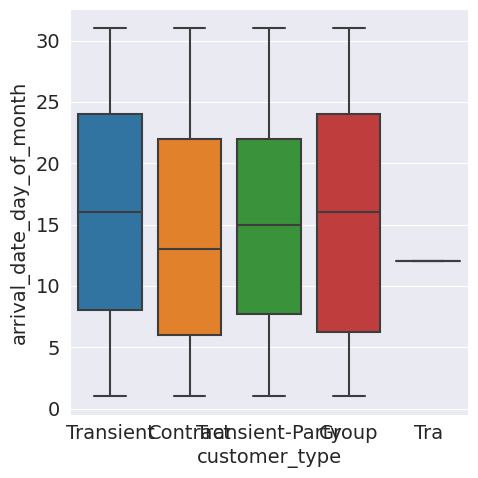

In [18]:
plt.figure(figsize=(20,15))
sns.catplot(data = hotel_data, x ='customer_type' , y= 'arrival_date_day_of_month' ,kind='box')
plt.show();

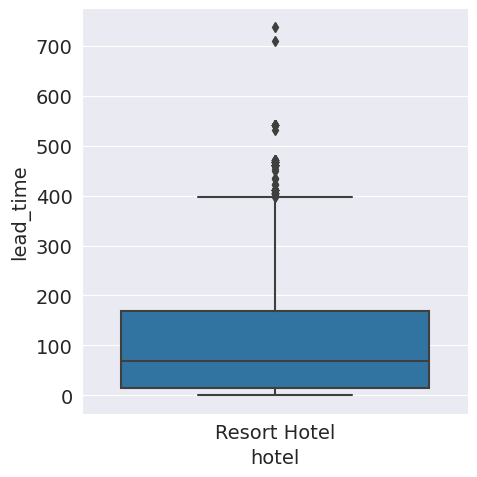

In [19]:
# sns.catplot(x = 'arrival_date_month', y = 'stays_in_week_nights',data = hotel_data, kind = 'bar')
# hotel_data  customer_type

sns.catplot(data = hotel_data, x ='hotel' , y= 'lead_time' ,kind='box')

In [20]:
hotel_data["arrival_date_month"] = hotel_data["arrival_date_month"].map(date_dic)





<Axes: >

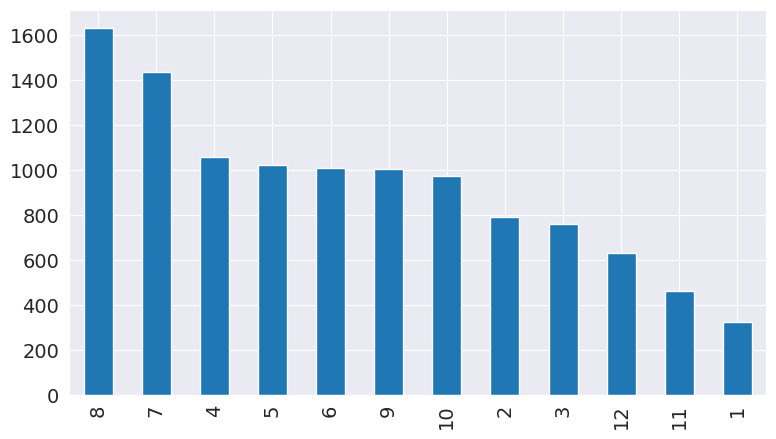

In [21]:
# f = hotel_data.groupby('arrival_date_month')['is_canceled'].mean().plot(kind='pie')
# f.sort_values()

con =  hotel_data['is_canceled'] == 1

hotel_data[con]['arrival_date_month'].value_counts().plot(kind = 'bar')


<Axes: >

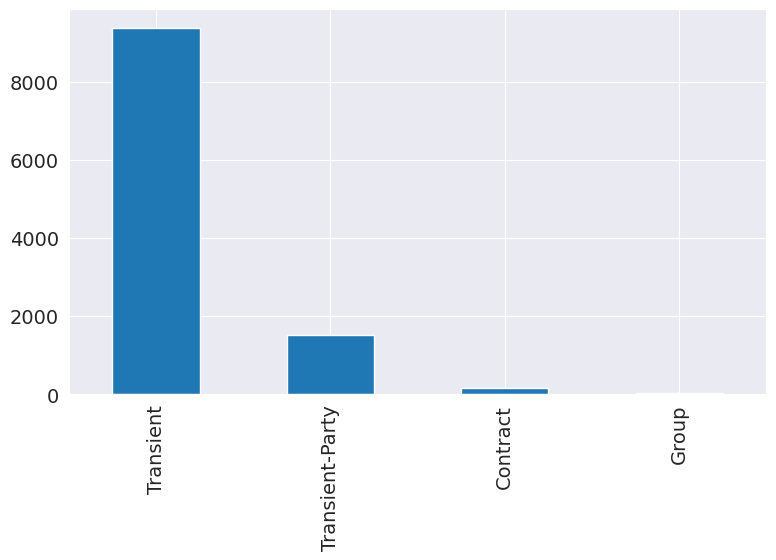

In [22]:


hotel_data[hotel_data['is_canceled'] == 1]['customer_type'].value_counts().plot(kind = 'bar')

In [23]:
hotel_data['meal'].agg(['value_counts'])

,value_counts
BB,16062
HB,4613
FB,631
Undefined,610
SC,27


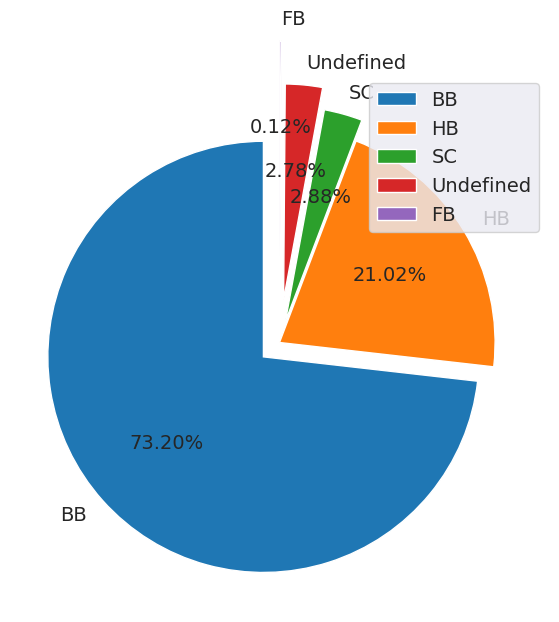

In [24]:
meal = ["BB", "HB", "SC", "Undefined", "FB"]
values = hotel_data.meal.value_counts()

plt.figure(figsize = (10, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2, 0.4), autopct = "%.2f%%",startangle = 90);

plt.legend()

plt.show();

In [25]:
hotel_data['arrival_date_year'].agg(['value_counts'])

,value_counts
2016,9074
2015,8308
2017,4561


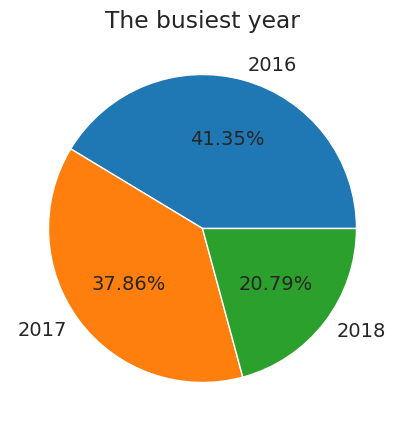

In [26]:
year=['2016','2017','2018']
vals = hotel_data['arrival_date_year'].value_counts()

plt.title('The busiest year')
plt.pie(vals,labels = year,autopct = "%.2f%%" );

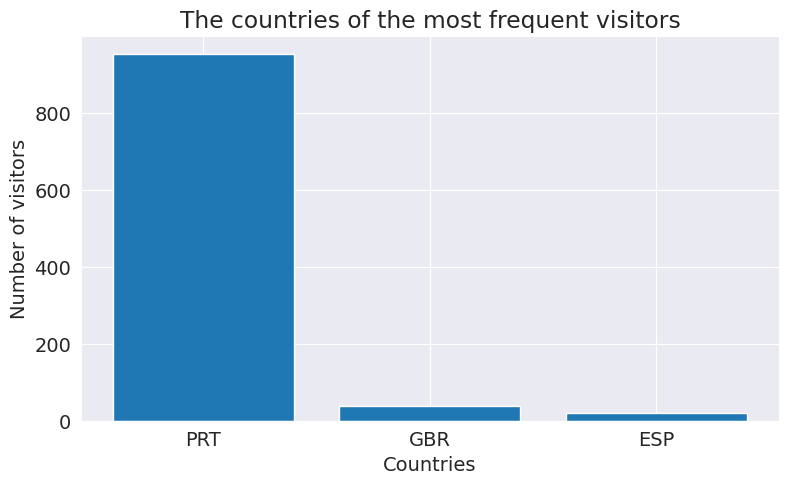

In [27]:
fre_country = hotel_data[hotel_data['is_repeated_guest'] == 1]['country'].value_counts().reset_index()

#Select countries with visitors more than 20
fre_country = fre_country[fre_country['country'] > 20 ].set_index('index')

plt.title('The countries of the most frequent visitors')
plt.bar(height= fre_country.country, x = fre_country.index)
plt.xlabel('Countries')
plt.ylabel('Number of visitors')
plt.show();


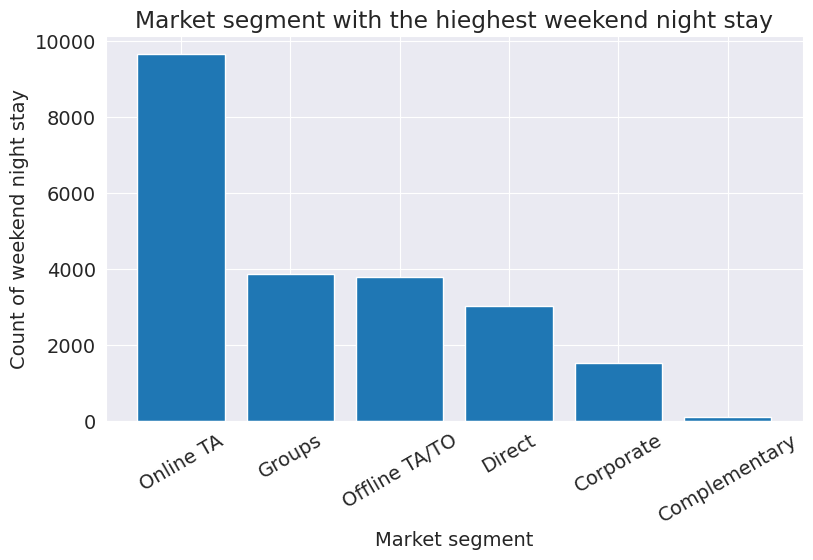

In [28]:
segment =  hotel_data.groupby('market_segment')['stays_in_weekend_nights'].count().sort_values(ascending = False)

plt.title('Market segment with the hieghest weekend night stay')
plt.bar(height= segment, x = segment.index)
plt.xlabel('Market segment')
plt.ylabel('Count of weekend night stay')
plt.xticks(rotation = 30)
plt.show();


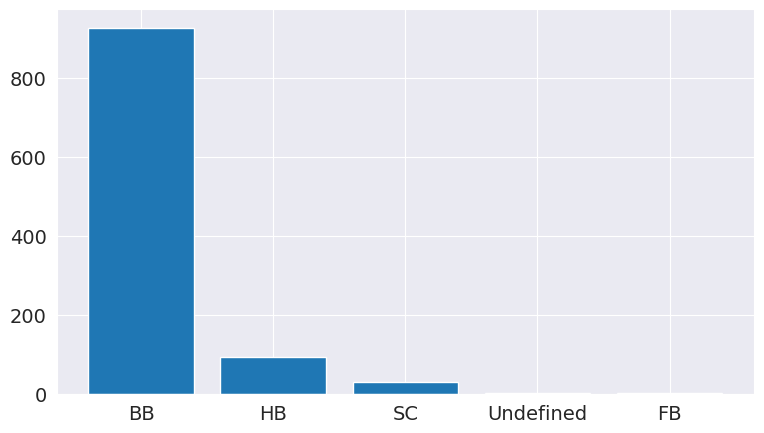

In [29]:
meals = hotel_data[hotel_data['is_repeated_guest'] == 1]['meal'].value_counts()
meal_label = ["BB", "HB", "SC", "Undefined", "FB"]


plt.bar(x = meal_label, height=meals )

# plt.pie(meals, labels=meal_label ,autopct = "%.2f%%", explode = (0.1,0.2,0.3,0.4,1))
plt.show()